<a href="https://colab.research.google.com/github/hardikcode-creator/NLP/blob/main/NLP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install gensim

In [ ]:
import gensim

In [ ]:
from gensim.models import Word2Vec,KeyedVectors


In [ ]:
# word2vec for word 'king

import gensim.downloader as api
wv=api.load('word2vec-google-news-300')
vec_king=wv['king']

In [ ]:
vec_king.shape

(300,)

In [ ]:
wv.most_similar('man')

[('woman', 0.7664012908935547),
 ('boy', 0.6824871301651001),
 ('teenager', 0.6586930155754089),
 ('teenage_girl', 0.6147903203964233),
 ('girl', 0.5921714305877686),
 ('suspected_purse_snatcher', 0.571636438369751),
 ('robber', 0.5585119128227234),
 ('Robbery_suspect', 0.5584409832954407),
 ('teen_ager', 0.5549196600914001),
 ('men', 0.5489763021469116)]

In [ ]:
wv.similarity('man','king')

0.22942673

In [ ]:
vec=wv['man']-wv['woman']+wv['queen']

In [ ]:
wv.most_similar([vec])

[('queen', 0.8393025994300842),
 ('king', 0.7046406865119934),
 ('queens', 0.6252749562263489),
 ('kings', 0.5996941924095154),
 ('monarch', 0.5614756941795349),
 ('princess', 0.5421434044837952),
 ('prince', 0.5245699286460876),
 ('royal', 0.5167840123176575),
 ('NYC_anglophiles_aflutter', 0.5163366198539734),
 ('princes', 0.5148828625679016)]

In [35]:
import pandas as pd
import re
import nltk
nltk.download('wordnet')
df=pd.read_csv('spam.csv',encoding='latin1')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer=WordNetLemmatizer()


In [37]:
df=df[['v1','v2']]

In [38]:

df.columns=['label','message']
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
corpus=[]
for i in range(0,len(df)):
  review=re.sub('[^a-zA-Z]',' ',df['message'][i])
  review=review.lower()
  review=review.split()
  review=[lemmatizer.lemmatize(word) for word in review ]
  review=' '.join(review)
  corpus.append(review)

In [40]:
corpus

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s',
 'u dun say so early hor u c already then say',
 'nah i don t think he go to usf he life around here though',
 'freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv',
 'even my brother is not like to speak with me they treat me like aid patent',
 'a per your request melle melle oru minnaminunginte nurungu vettam ha been set a your callertune for all caller press to copy your friend callertune',
 'winner a a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hour only',
 'had your mobile month or more u r entitled to update to the latest colour mobile with camera for free call the mobile up

In [41]:
from nltk.tokenize import sent_tokenize
from gensim.utils  import simple_preprocess
nltk.download('punkt_tab')
words=[]
for sent in corpus:
  sent_token=sent_tokenize(sent)
  for sent in sent_token:
    words.append(simple_preprocess(sent))


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [42]:
import gensim
model=gensim.models.Word2Vec(words)

In [43]:
model.wv.index_to_key

['you',
 'to',
 'the',
 'and',
 'it',
 'in',
 'is',
 'me',
 'my',
 'for',
 'your',
 'call',
 'of',
 'that',
 'have',
 'on',
 'now',
 'are',
 'can',
 'so',
 'but',
 'not',
 'or',
 'we',
 'do',
 'get',
 'at',
 'be',
 'if',
 'will',
 'ur',
 'with',
 'no',
 'just',
 'this',
 'gt',
 'lt',
 'how',
 'go',
 'up',
 'when',
 'ok',
 'day',
 'what',
 'free',
 'from',
 'out',
 'all',
 'know',
 'll',
 'come',
 'like',
 'time',
 'good',
 'then',
 'am',
 'got',
 'wa',
 'there',
 'he',
 'text',
 'only',
 'love',
 'want',
 'send',
 'txt',
 'need',
 'one',
 'today',
 'by',
 'going',
 'don',
 'home',
 'stop',
 'about',
 'she',
 'lor',
 'sorry',
 'see',
 'still',
 'mobile',
 'take',
 'back',
 'da',
 'reply',
 'our',
 'think',
 'dont',
 'tell',
 'week',
 'phone',
 'hi',
 'new',
 'later',
 'they',
 'her',
 'any',
 'pls',
 'ha',
 'please',
 'co',
 'did',
 'msg',
 'been',
 'min',
 'some',
 'an',
 'make',
 'dear',
 'here',
 'night',
 'who',
 'message',
 'say',
 'well',
 're',
 'where',
 'thing',
 'much',
 'clai

In [44]:

# size of vocabulary
model.corpus_count

5569

In [45]:
model.wv.similar_by_word('good')

[('day', 0.9988637566566467),
 ('where', 0.9987844824790955),
 ('hope', 0.9987149238586426),
 ('morning', 0.998668372631073),
 ('about', 0.9986643195152283),
 ('all', 0.9986029863357544),
 ('well', 0.9986016154289246),
 ('should', 0.9985934495925903),
 ('happy', 0.998502254486084),
 ('amp', 0.9984962940216064)]

In [46]:
model.wv['good'].shape

(100,)

In [47]:
import numpy as np
def avgword2vec(doc):
  return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

In [48]:
!pip install tqdm
from tqdm import tqdm
X=[]
nan_index=[]
for i in tqdm(range(len(words))):
  temp=avgword2vec(words[i])
  if np.any(np.isnan(temp)):
    nan_index.append(i)
  else:
    X.append(temp)

  0%|          | 0/5569 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 5569/5569 [00:00<00:00, 5894.12it/s]


In [49]:
nan_index

[450, 782, 2101, 2568, 3267, 3738, 3977, 4289, 4476, 4618, 5170, 5411]

In [50]:
# this words are not in vocabulary
doc = ['hank', 'lotsly', 'beerage', 'audrie', 'lousy', 'autocorrect']
avg_vector = avgword2vec(doc)
print(avg_vector)

nan


In [51]:
df['label']

,label
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


In [53]:
# Difference in shape as
[[i,j,k] for i,j,k in zip(list(map(len,corpus)),corpus,df['message']) if i<1]

[[0, '', '645'], [0, '', ':) '], [0, '', ':-) :-)']]

In [58]:
y=df[list(map(lambda x:len(x)>0,corpus))]
y=pd.get_dummies(y['label'],drop_first=True)
for i in nan_index:
  y=y.drop(y.index[i])
y=y.reset_index(drop=True)

y.shape

(5557, 1)

In [59]:
X_new=np.array(X)

In [60]:
print(X_new.shape,y.shape)

(5557, 100) (5557, 1)


In [61]:
df=pd.DataFrame()
for i in range(0,len(X)):
  reshaped=pd.DataFrame(X[i].reshape(1,-1))
  df=pd.concat([df,reshaped])
df.shape


(5557, 100)

In [62]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X_new,y,test_size=0.2,random_state=0)

In [63]:
# For classification Problem -- we could use RandomForest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [64]:
y_pred=rf.predict(X_test)

0.9622302158273381


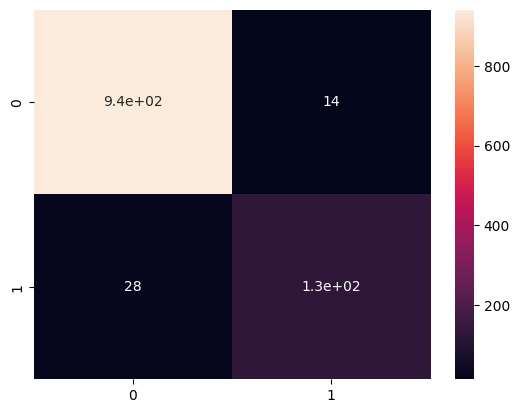

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test,y_pred), annot=True)
print(accuracy_score(Y_test,y_pred))